In [17]:
"""
GBDT + LogisticRegression
"""
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report


%matplotlib inline

In [8]:
def plot_decision_regions(X, y, classifier=None, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if classifier:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=np.array([cmap(idx)]),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# Make Moons function 介紹
畫出兩個月亮（上弦下弦），用來顯示出tree base的強大切割能力，noise越大越混亂  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

In [19]:
X, y = make_moons(n_samples=1000, noise=0.24, random_state=0)
X, y


(array([[ 2.10351547,  0.59636994],
        [ 1.83831838,  0.0626787 ],
        [-0.21241012,  0.49794289],
        ...,
        [ 0.37487807, -0.71831806],
        [ 0.20918514,  0.0473448 ],
        [ 0.46289572, -0.55617834]]),
 array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 

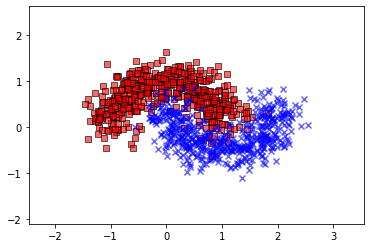

In [20]:
plot_decision_regions(X,y)

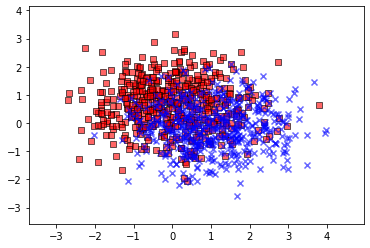

In [10]:
X, y = make_moons(n_samples=1000, noise=0.8, random_state=0)
X, y
plot_decision_regions(X,y)

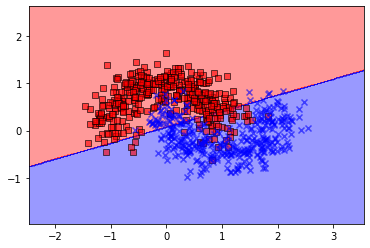

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       113
           1       0.87      0.88      0.87       137

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



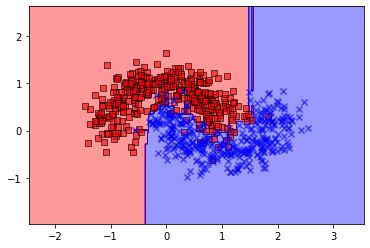

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       113
           1       0.95      0.94      0.95       137

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



/Users/yehjames/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


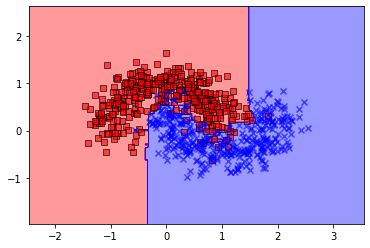

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       113
           1       0.95      0.93      0.94       137

    accuracy                           0.94       250
   macro avg       0.93      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [16]:
class GBDTTransformer(TransformerMixin):
    def __init__(self, n_estimators=200):
        self.n_estimators = n_estimators
        self.gbdt = GradientBoostingClassifier(n_estimators=n_estimators)
        self.gbdt_ohe = OneHotEncoder()
    def fit(self, X, y):
        self.gbdt.fit(X, y)
        # 對葉子編號做 one-hot encoding
        self.gbdt_ohe.fit(self.gbdt.apply(X)[:, :, 0])
        return self
    def transform(self, X):
        return self.gbdt_ohe.transform(self.gbdt.apply(X)[:, :, 0])
if __name__ == '__main__':
    X, y = make_moons(n_samples=1000, noise=0.24, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    classifiers = [
        LogisticRegression(),
        GradientBoostingClassifier(),
        # 主要重點 使用 Pipeline 把兩個 model 接起來
        Pipeline([('gbdt', GBDTTransformer()),
                  ('lr', LogisticRegression())])
    ]
    for clf in classifiers:
        clf.fit(X_train, y_train)
        plot_decision_regions(X_train,y_train,clf)
        plt.show()
        print(classification_report(y_test, clf.predict(X_test)))

